# Riskfolio-Lib Tutorial: 
<br><a href="https://www.kqzyfj.com/click-101359873-15150084?url=https%3A%2F%2Flink.springer.com%2Fbook%2F9783031843037" target="_blank">
        <button style="padding:10px 20px; font-size:16px; background-color: #FFA500; color:white; border:none; border-radius:5px; cursor:pointer;">
            Buy Advanced Portfolio Optimization Book on Springer
        </button>
    </a>
<br>
<br><a href='https://ko-fi.com/B0B833SXD' target='_blank'><img height='36' style='border:0px;height:36px;' src='https://cdn.ko-fi.com/cdn/kofi1.png?v=2' border='0' alt='Buy Me a Coffee at ko-fi.com' /></a> 
<br>
<br>__[Financionerioncios](https://financioneroncios.wordpress.com)__
<br>__[Orenji](https://www.linkedin.com/company/orenj-i)__
<br>__[Riskfolio-Lib](https://riskfolio-lib.readthedocs.io/en/latest/)__
<br>__[Dany Cajas](https://www.linkedin.com/in/dany-cajas/)__

## Tutorial 46: Classic Mean Risk Optimization with Network and Dendrogram Constraints

This tutorial is based on the following working papers:

- __[A Graph Theory Approach to Portfolio Optimization](https://papers.ssrn.com/sol3/papers.cfm?abstract_id=4602019)__
- __[A Graph Theory Approach to Portfolio Optimization Part II](https://papers.ssrn.com/sol3/papers.cfm?abstract_id=4667426)__

## 1. Downloading the data:

In [1]:
import numpy as np
import pandas as pd
import yfinance as yf
import warnings

warnings.filterwarnings("ignore")
pd.options.display.float_format = '{:.4%}'.format

# Date range
start = '2016-01-01'
end = '2019-12-30'

# Tickers of assets
assets = ['JCI', 'TGT', 'CMCSA', 'CPB', 'MO', 'APA', 'MMC', 'JPM',
          'ZION', 'PSA', 'BAX', 'BMY', 'LUV', 'PCAR', 'TXT', 'TMO',
          'DE', 'MSFT', 'HPQ', 'SEE', 'VZ', 'CNP', 'NI', 'T', 'BA']
assets.sort()

# Downloading data
data = yf.download(assets, start = start, end = end, auto_adjust=False)
data = data.loc[:,('Adj Close', slice(None))]
data.columns = assets

[*********************100%***********************]  25 of 25 completed


In [2]:
# Calculating returns

Y = data[assets].pct_change().dropna()

display(Y.head())

,APA,BA,BAX,BMY,CMCSA,CNP,CPB,DE,HPQ,JCI,...,NI,PCAR,PSA,SEE,T,TGT,TMO,TXT,VZ,ZION
Date,,,,,,,,,,,,,,,,,,,,,
2016-01-05,-2.0257%,0.4057%,0.4035%,1.9692%,0.0180%,0.9305%,0.3678%,0.5784%,0.9483%,-1.1953%,...,1.5881%,0.0212%,2.8236%,0.9758%,0.6987%,1.7539%,-0.1730%,0.2409%,1.3734%,-1.0857%
2016-01-06,-11.4863%,-1.5878%,0.2412%,-1.7556%,-0.7727%,-1.2473%,-0.1736%,-1.1239%,-3.5866%,-0.9551%,...,0.5547%,0.0212%,0.1592%,-1.5646%,0.3107%,-1.0155%,-0.7653%,-3.0048%,-0.9034%,-2.9145%
2016-01-07,-5.1389%,-4.1922%,-1.6573%,-2.7699%,-1.1047%,-1.9769%,-1.2207%,-0.8855%,-4.6059%,-2.5394%,...,-2.2066%,-3.0309%,-1.0410%,-3.1557%,-1.6148%,-0.2700%,-2.2845%,-2.0570%,-0.5492%,-3.0019%
2016-01-08,0.2736%,-2.2705%,-1.6037%,-2.5425%,0.1098%,-0.2241%,0.5706%,-1.6402%,-1.7642%,-0.1649%,...,-0.1539%,-1.1366%,-0.7308%,-0.1448%,0.0895%,-3.3838%,-0.1117%,-1.1387%,-0.9719%,-1.1254%
2016-01-11,-4.3383%,0.1692%,-1.6851%,-1.0215%,0.0914%,-1.1791%,0.5674%,0.5288%,0.6616%,0.0330%,...,1.6436%,0.0000%,0.9869%,-0.1450%,1.2224%,1.4569%,0.5367%,-0.4607%,0.5800%,-1.9919%


## 2. Estimating Mean Risk Portfolios

### 2.1 Calculating the portfolio that minimizes risk

In [3]:
import riskfolio as rp

# Building the portfolio object
port = rp.Portfolio(returns=Y)

# Calculating optimal portfolio

# Select method and estimate input parameters:

method_mu='hist' # Method to estimate expected returns based on historical data.
method_cov='hist' # Method to estimate covariance matrix based on historical data.

port.assets_stats(method_mu=method_mu, method_cov=method_cov)

# Estimate optimal portfolio:

model='Classic' # Could be Classic (historical), BL (Black Litterman) or FM (Factor Model)
rm = 'MV' # Risk measure used, this time will be variance
obj = 'MinRisk' # Objective function, could be MinRisk, MaxRet, Utility or Sharpe
hist = True # Use historical scenarios for risk measures that depend on scenarios
rf = 0 # Risk free rate
l = 0 # Risk aversion factor, only useful when obj is 'Utility'

w = port.optimization(model=model, rm=rm, obj=obj, rf=rf, l=l, hist=hist)

display(w.T)

,APA,BA,BAX,BMY,CMCSA,CNP,CPB,DE,HPQ,JCI,...,NI,PCAR,PSA,SEE,T,TGT,TMO,TXT,VZ,ZION
weights,0.0000%,0.0000%,5.2377%,4.3880%,2.1296%,6.9907%,3.2270%,0.0741%,0.0000%,2.8446%,...,11.4529%,0.0000%,14.9247%,0.1681%,6.5903%,4.0900%,0.0000%,0.0000%,8.2766%,0.0000%


### 2.2 Plotting Network and Cluster Network Allocation

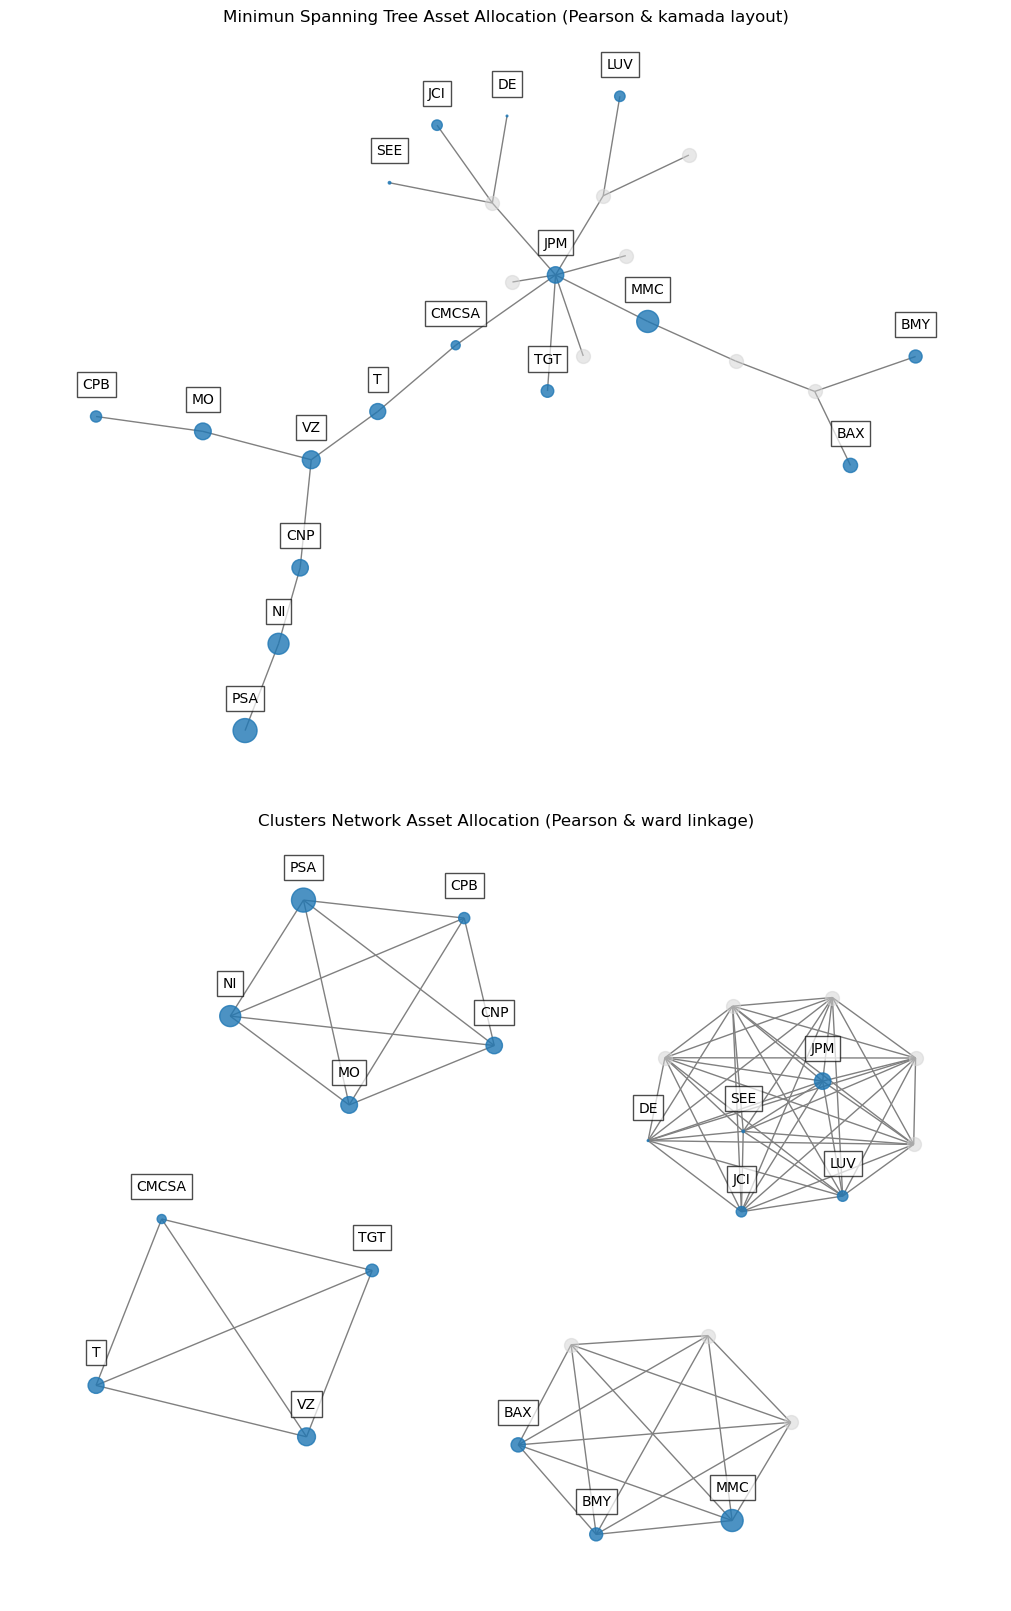

In [4]:
import matplotlib.pyplot as plt

# Plotting the composition of the portfolio in MST
fig, ax = plt.subplots(2,1, figsize=(10,16))
ax = np.ravel(ax)

ax[0] = rp.plot_network_allocation(returns=Y,
                                   w=w,
                                   codependence="pearson",
                                   linkage="ward",
                                   alpha_tail=0.05,
                                   node_labels=True,
                                   leaf_order=True,
                                   kind='kamada',
                                   seed=123,
                                   ax=ax[0])

# Plotting the composition of the portfolio in the Dendrogram Cluster Network
ax[1] = rp.plot_clusters_network_allocation(returns=Y,
                                            w=w,
                                            codependence="pearson",
                                            linkage="ward",
                                            k=None,
                                            max_k=10,
                                            ax=ax[1])


In [5]:
ca = rp.connected_assets(Y,
                         w,
                         codependence="pearson",
                         graph="MST",
                         walk_size=1)

ra = rp.related_assets(Y,
                       w,codependence="pearson",
                       linkage="ward",
                       k=None,
                       max_k=10)

print("Percentage Invested in Connected Assets",  np.round(ca,6))
print("Percentage Invested in Related Assets",  np.round(ra,6))

Percentage Invested in Connected Assets 0.118262
Percentage Invested in Related Assets 0.215525


The indicators above tell us that the minimum variance portfolio invest an 11.8% in assets that are neighbors and a 21.5% in assets that are in the same cluster.

## 3. Estimating Mean Risk Portfolios with Constraints in Centrality Measure Vector and Connection Matrix 

### 3.1 Calculating the Centrality Measure Vector and Connection Matrix

In [6]:
CV = rp.centrality_vector(Y,
                          measure='Degree',
                          codependence="pearson",
                          graph="MST")

B_1 = rp.connection_matrix(Y,
                           codependence="pearson",
                           graph="MST",
                           walk_size=1)

print("Centrality Measure Vector")
print(CV)
print("Connection Matrix")
print(B_1)

Centrality Measure Vector
[[1. 1. 1. 1. 2. 2. 1. 1. 1. 1. 8. 1. 2. 2. 2. 2. 4. 1. 1. 2. 1. 3. 3. 3.
  1.]]
Connection Matrix
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.
  0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.
  0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.
  0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.
  0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1.
  0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.
  0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.
  0.]
 [1. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 1. 0. 1. 0.
 

### 3.2 Calculating the Portfolio that Invest in the Periphery of the MST

In [7]:
port.acentrality = CV
port.bcentrality = np.ones((1,1))

# Estimate the portfolio that minimizes the risk
w = port.optimization(model=model, rm=rm, obj=obj, rf=rf, l=l, hist=hist)

display(w.T)

,APA,BA,BAX,BMY,CMCSA,CNP,CPB,DE,HPQ,JCI,...,NI,PCAR,PSA,SEE,T,TGT,TMO,TXT,VZ,ZION
weights,0.5129%,2.1408%,13.9937%,8.9260%,0.0000%,0.0000%,12.2814%,4.1940%,0.4590%,7.3677%,...,0.0000%,0.0000%,28.6244%,4.3912%,0.0000%,7.0463%,0.0000%,0.0000%,0.0000%,5.4456%


### 3.2 Plotting portfolio composition in the network

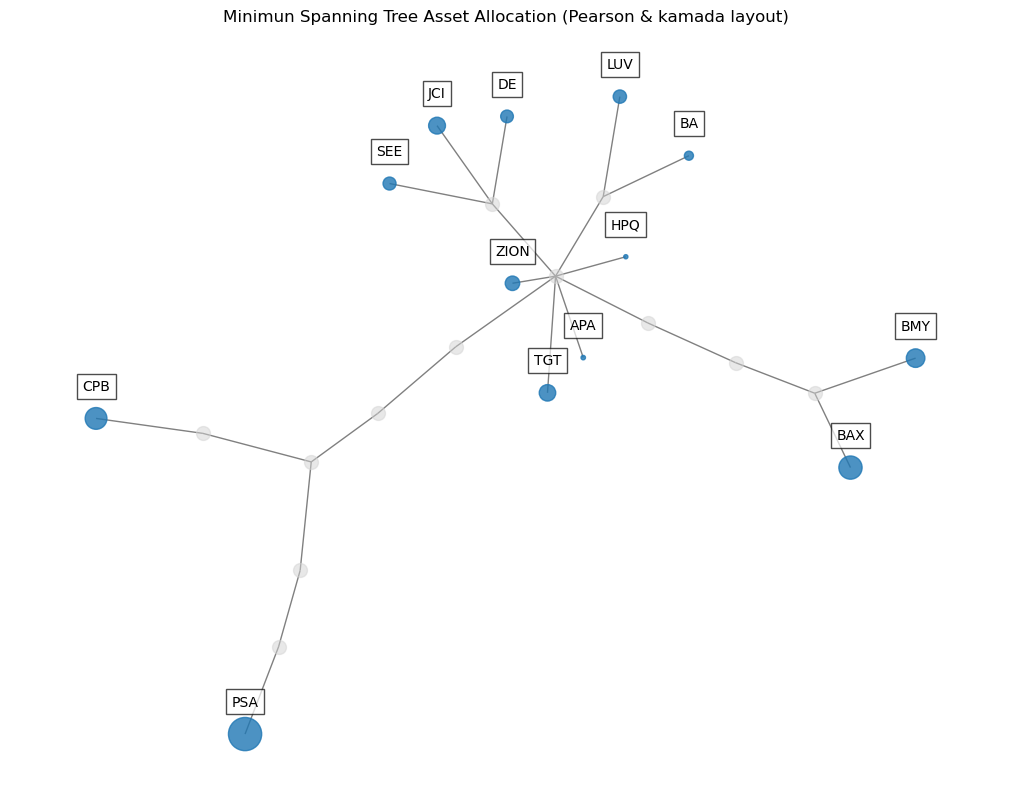

In [8]:
fig, ax = plt.subplots(figsize=(10,8))

ax = rp.plot_network_allocation(returns=Y,
                                w=w,
                                codependence="pearson",
                                linkage="ward",
                                alpha_tail=0.05,
                                node_labels=True,
                                leaf_order=True,
                                kind='kamada',
                                seed=123,
                                ax=ax)

In [9]:
ca = rp.connected_assets(Y,
                         w,
                         codependence="pearson",
                         graph="MST",
                         walk_size=1)

print("Percentage Invested in Connected Assets", np.round(ca,6))

Percentage Invested in Connected Assets 0.0


### 3.3 Calculating the Portfolio that Invest in the Assets that are not Neighbors

### 3.3.1 Integer Programming (IP) Approach

In [10]:
port.acentrality = None
port.bcentrality = None

# Adding the connection matrix as a network constraint
port.network_ip = B_1
port.solvers = ['MOSEK'] # we need a solver that supports integer programming

# Estimate the portfolio that minimizes the risk
w = port.optimization(model=model, rm=rm, obj=obj, rf=rf, l=l, hist=hist)

display(w.T)

,APA,BA,BAX,BMY,CMCSA,CNP,CPB,DE,HPQ,JCI,...,NI,PCAR,PSA,SEE,T,TGT,TMO,TXT,VZ,ZION
weights,0.0000%,0.0000%,11.7613%,0.0000%,0.0000%,0.0000%,8.2248%,0.0000%,0.0000%,5.9049%,...,0.0000%,0.0000%,23.5537%,0.0000%,20.5886%,0.0000%,0.0000%,0.0000%,0.0000%,0.0000%


### 3.3.2 Plotting portfolio composition in the network

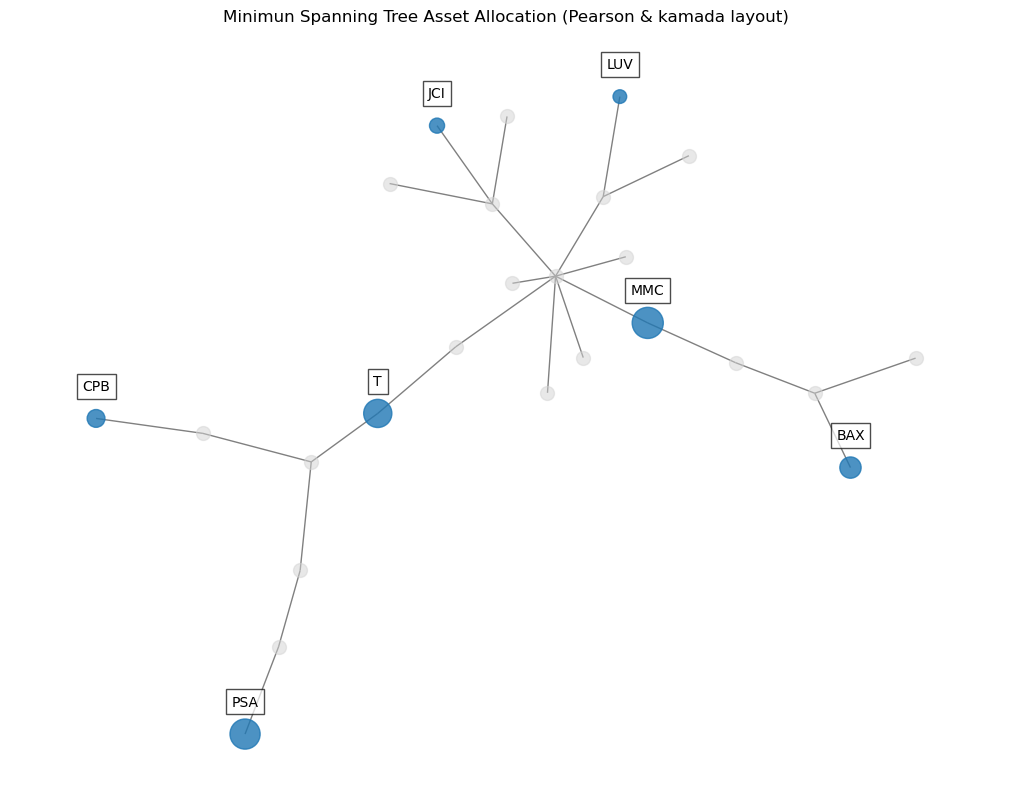

In [11]:
fig, ax = plt.subplots(figsize=(10,8))

ax = rp.plot_network_allocation(returns=Y,
                                w=w,
                                codependence="pearson",
                                linkage="ward",
                                alpha_tail=0.05,
                                node_labels=True,
                                leaf_order=True,
                                kind='kamada',
                                seed=123,
                                ax=ax)

In [12]:
ca = rp.connected_assets(Y,
                         w,
                         codependence="pearson",
                         graph="MST",
                         walk_size=1)

print("Percentage Invested in Connected Assets", np.round(ca,6))

Percentage Invested in Connected Assets 0.0


### 3.3.3 Semidefinite Programming (SDP) Approach

In [13]:
# Adding the connection matrix as a network constraint
port.network_sdp = B_1
# port.network_penalty = 0.05 # This parameter is used for risk measures different form 'MV', 'KT' and 'SKT'

port.solvers = ['CLARABEL'] # we need a solver that supports SDP programming

# Estimate the portfolio that minimizes the risk
w = port.optimization(model=model, rm=rm, obj=obj, rf=rf, l=l, hist=hist)

display(w.T)

,APA,BA,BAX,BMY,CMCSA,CNP,CPB,DE,HPQ,JCI,...,NI,PCAR,PSA,SEE,T,TGT,TMO,TXT,VZ,ZION
weights,0.0000%,0.0000%,6.5074%,4.7497%,0.0000%,14.7983%,0.0000%,0.0000%,0.0000%,3.4011%,...,0.0000%,0.0000%,18.8451%,0.7996%,13.0354%,5.1882%,0.0000%,0.0000%,0.0000%,1.9472%


### 3.3.4 Plotting portfolio composition in the network

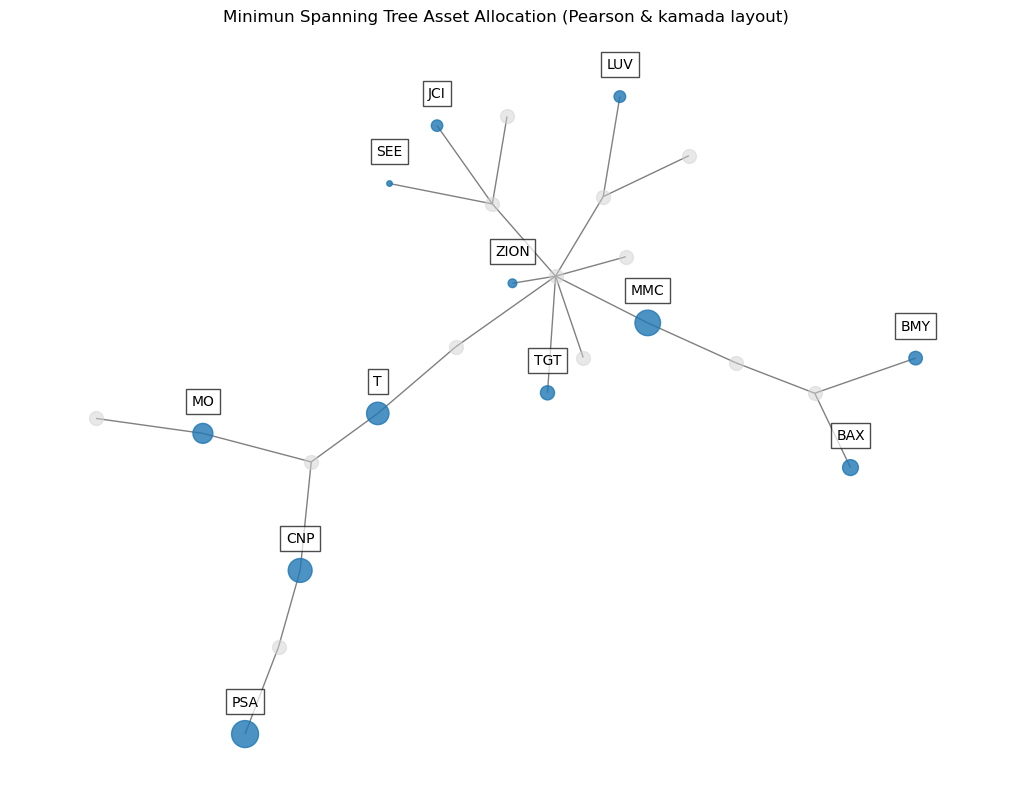

In [14]:
fig, ax = plt.subplots(figsize=(10,8))

ax = rp.plot_network_allocation(returns=Y,
                                w=w,
                                codependence="pearson",
                                linkage="ward",
                                alpha_tail=0.05,
                                node_labels=True,
                                leaf_order=True,
                                kind='kamada',
                                seed=123,
                                ax=ax)

In [15]:
ca = rp.connected_assets(Y,
                         w,
                         codependence="pearson",
                         graph="MST",
                         walk_size=1)

print("Percentage Invested in Connected Assets", np.round(ca,6))

Percentage Invested in Connected Assets 0.0


## 4. Estimating Mean Risk Portfolios with Constraints in Dendrograms 

### 4.1 Calculating the Adjacency Label Matrix based on Dendrogram Clusters

In [16]:
L_A = rp.clusters_matrix(Y,
                         codependence="pearson",
                         linkage="ward",
                         k=None,
                         max_k=10)

print("Print Label Adjacency Matrix")
print(L_A)

Print Label Adjacency Matrix
[[0. 1. 0. 0. 0. 0. 0. 1. 0. 1. 1. 1. 0. 0. 0. 0. 1. 0. 1. 0. 0. 0. 1. 0.
  1.]
 [1. 0. 0. 0. 0. 0. 0. 1. 0. 1. 1. 1. 0. 0. 0. 0. 1. 0. 1. 0. 0. 0. 1. 0.
  1.]
 [0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0.
  0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0.
  0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 1.
  0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0.
  0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0.
  0.]
 [1. 1. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 0. 0. 0. 0. 1. 0. 1. 0. 0. 0. 1. 0.
  1.]
 [0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0.
  0.]
 [1. 1. 0. 0. 0. 0. 0. 1. 0. 0. 1. 1. 0. 0. 0. 0. 1. 0. 1. 0. 0. 0. 1. 0.
  1.]
 [1. 1. 0. 0. 0. 0. 0. 1. 0. 1. 0. 1. 0. 0. 0. 0. 1. 0. 1. 0. 0. 0. 1. 0.
  1.]
 [1. 1. 0. 0. 0. 0. 0. 1. 0. 1. 1. 0. 0. 0. 0. 0. 1. 0. 1. 0. 0. 0. 1. 0.
  1.]
 [0. 0. 1. 

### 4.2 Calculating the Portfolio that Invest in the Assets that are in different clusters

### 4.2.1 IP Approach

In [17]:
# Adding the adjacency label matrix as a network constraint
port.network_ip = L_A
port.solvers = ['MOSEK'] # we need a solver that supports integer programming

# Estimate the portfolio that minimizes the risk
w = port.optimization(model=model, rm=rm, obj=obj, rf=rf, l=l, hist=hist)

display(w.T)

,APA,BA,BAX,BMY,CMCSA,CNP,CPB,DE,HPQ,JCI,...,NI,PCAR,PSA,SEE,T,TGT,TMO,TXT,VZ,ZION
weights,0.0000%,0.0000%,0.0000%,0.0000%,0.0000%,0.0000%,0.0000%,0.0000%,0.0000%,0.0000%,...,0.0000%,0.0000%,28.5043%,0.0000%,0.0000%,0.0000%,0.0000%,0.0000%,27.7230%,0.0000%


### 4.2.2 Plotting portfolio composition in the cluster network

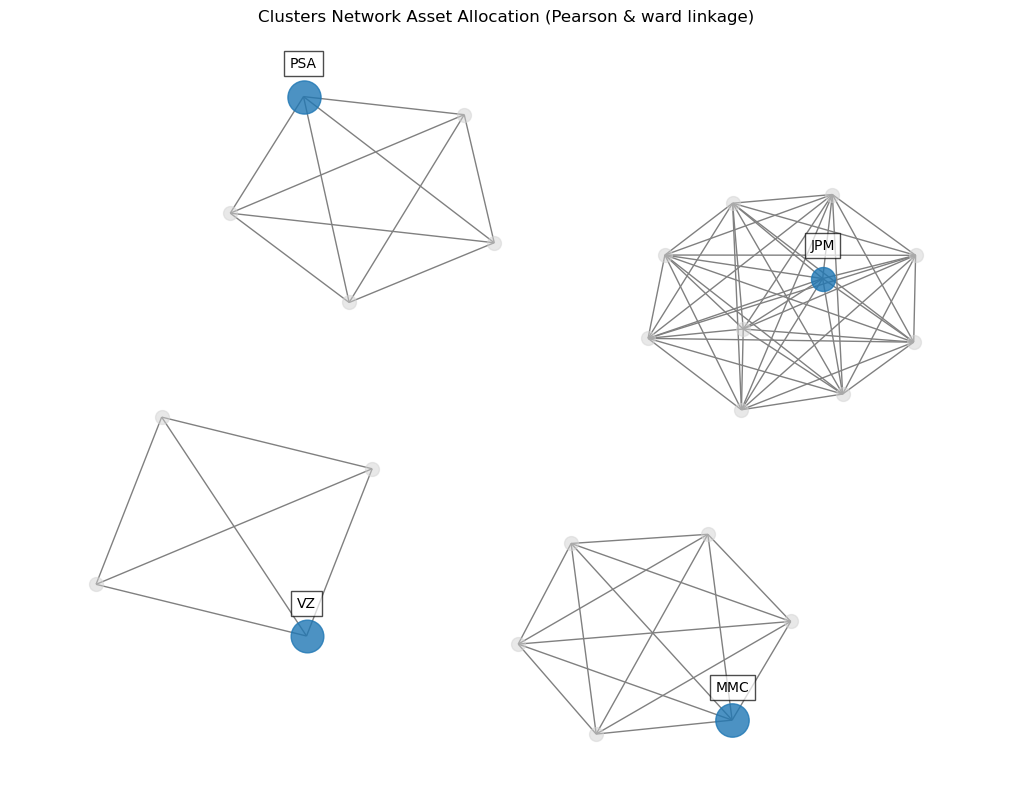

In [18]:
fig, ax = plt.subplots(figsize=(10,8))

ax = rp.plot_clusters_network_allocation(returns=Y,
                                         w=w,
                                         codependence="pearson",
                                         linkage="ward",
                                         k=None,
                                         max_k=10,
                                         ax=ax)

In [19]:
ra = rp.related_assets(Y,
                       w,codependence="pearson",
                       linkage="ward",
                       k=None,
                       max_k=10)

print("Percentage Invested in Related Assets",  np.round(ra,6))

Percentage Invested in Related Assets 0.0


### 4.2.3 SDP Approach

In [20]:
# Adding the adjacency label matrix as a network constraint
port.network_sdp = L_A
port.solvers = ['MOSEK'] # we need a solver that supports integer programming

# Estimate the portfolio that minimizes the risk
w = port.optimization(model=model, rm=rm, obj=obj, rf=rf, l=l, hist=hist)

display(w.T)

,APA,BA,BAX,BMY,CMCSA,CNP,CPB,DE,HPQ,JCI,...,NI,PCAR,PSA,SEE,T,TGT,TMO,TXT,VZ,ZION
weights,0.0000%,0.0000%,0.0778%,0.0000%,0.0000%,0.0398%,0.0000%,0.0000%,0.0000%,1.4639%,...,1.4180%,0.0000%,26.8973%,0.0000%,0.2233%,0.0314%,0.0000%,0.0000%,27.3910%,0.0000%


### 4.2.4 Plotting portfolio composition in the cluster network

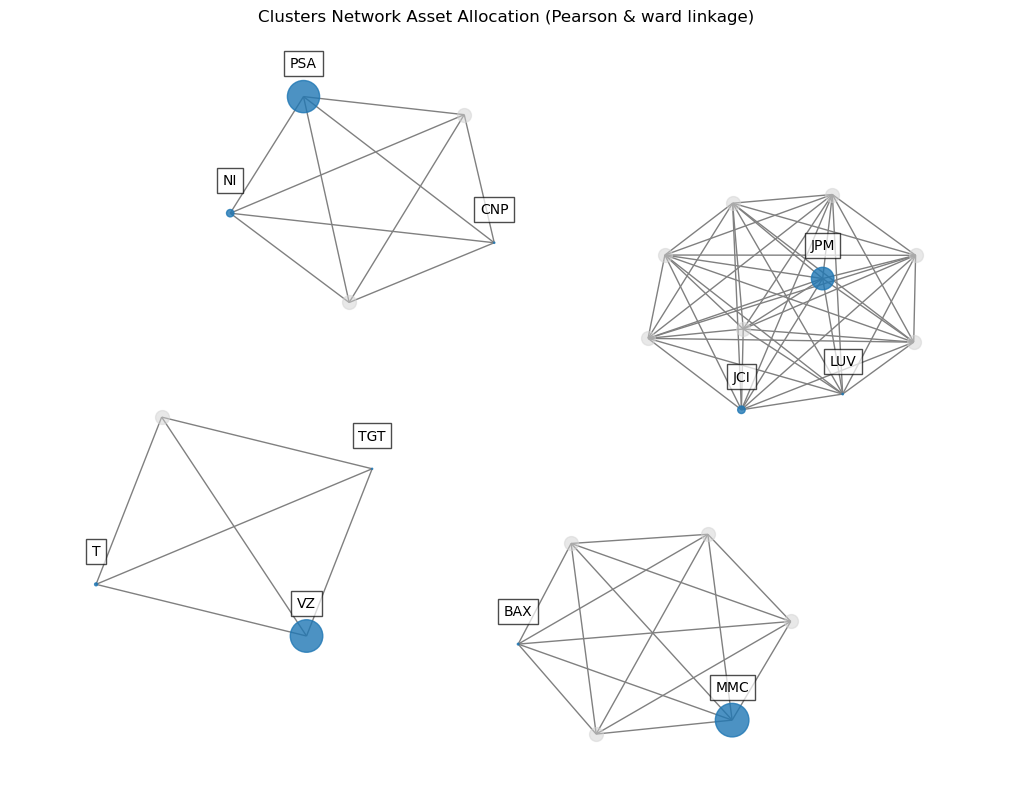

In [21]:
fig, ax = plt.subplots(figsize=(10,8))

ax = rp.plot_clusters_network_allocation(returns=Y,
                                         w=w,
                                         codependence="pearson",
                                         linkage="ward",
                                         k=None,
                                         max_k=10,
                                         ax=ax)

In [22]:
ra = rp.related_assets(Y,
                       w,codependence="pearson",
                       linkage="ward",
                       k=None,
                       max_k=10)

print("Percentage Invested in Related Assets",  np.round(ra,6))

Percentage Invested in Related Assets 0.013716
